<a href="https://colab.research.google.com/github/Sibahle01/Tic-Tac-Toe/blob/main/Tic_Tac_Toe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random

class TicTacToe:
    def __init__(self):
        self.board = np.zeros((3, 3), dtype=int)
        self.done = False
        self.winner = None

    def reset(self):
        self.board[:] = 0
        self.done = False
        self.winner = None
        return self.get_state()

    def get_state(self):
        return tuple(self.board.reshape(9))

    def available_actions(self):
        return [i for i in range(9) if self.board.reshape(9)[i] == 0]

    def step(self, action, player):
        if self.done:
            return self.get_state(), 0, True

        row, col = divmod(action, 3)
        if self.board[row, col] != 0:
            return self.get_state(), -10, True  # illegal move

        self.board[row, col] = player

        if self.check_winner(player):
            self.done = True
            self.winner = player
            return self.get_state(), 1, True

        if not self.available_actions():
            self.done = True
            self.winner = 0
            return self.get_state(), 0.5, True  # draw

        return self.get_state(), 0, False

    def check_winner(self, player):
        for i in range(3):
            if all(self.board[i, :] == player) or all(self.board[:, i] == player):
                return True
        if all(np.diag(self.board) == player) or all(np.diag(np.fliplr(self.board)) == player):
            return True
        return False


In [2]:
class QLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.9995, epsilon_min=0.1):
        self.q_table = {}
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def get_qs(self, state):
        if state not in self.q_table:
            self.q_table[state] = np.zeros(9)
        return self.q_table[state]

    def choose_action(self, state, available_actions):
        if np.random.rand() < self.epsilon:
            return random.choice(available_actions)
        qs = self.get_qs(state)
        filtered_qs = [(i, qs[i]) for i in available_actions]
        return max(filtered_qs, key=lambda x: x[1])[0]

    def learn(self, state, action, reward, next_state, done, available_actions):
        old_q = self.get_qs(state)[action]
        next_max_q = 0 if done else max(self.get_qs(next_state)[a] for a in available_actions)
        self.q_table[state][action] += self.alpha * (reward + self.gamma * next_max_q - old_q)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [3]:
class QLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.9995, epsilon_min=0.1):
        self.q_table = {}  # maps state -> action values
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def get_qs(self, state):
        if state not in self.q_table:
            self.q_table[state] = np.zeros(9)
        return self.q_table[state]

    def choose_action(self, state, available_actions):
        if np.random.rand() < self.epsilon:
            return random.choice(available_actions)
        qs = self.get_qs(state)
        filtered_qs = [(i, qs[i]) for i in available_actions]
        return max(filtered_qs, key=lambda x: x[1])[0]

    def learn(self, state, action, reward, next_state, done, available_actions):
        old_q = self.get_qs(state)[action]
        next_max_q = 0 if done else max(self.get_qs(next_state)[a] for a in available_actions)
        self.q_table[state][action] += self.alpha * (reward + self.gamma * next_max_q - old_q)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [ ]:
env = TicTacToe()
agent = QLearningAgent()

episodes = 10000

for ep in range(episodes):
    state = env.reset()
    done = False

    while not done:
        available = env.available_actions()
        action = agent.choose_action(state, available)
        next_state, reward, done = env.step(action, 1)

        if not done:
            # Opponent (random)
            opponent_action = random.choice(env.available_actions())
            next_state, opp_reward, done = env.step(opponent_action, -1)
            if done:
                reward = -1 if env.winner == -1 else 0.5

        agent.learn(state, action, reward, next_state, done, env.available_actions())
        state = next_state

    if (ep + 1) % 1000 == 0:
        print(f"Episode {ep+1}, Epsilon: {agent.epsilon:.3f}")


Episode 1000, Epsilon: 0.132
Episode 2000, Epsilon: 0.100
Episode 3000, Epsilon: 0.100
Episode 4000, Epsilon: 0.100
Episode 5000, Epsilon: 0.100
Episode 6000, Epsilon: 0.100
Episode 7000, Epsilon: 0.100
Episode 8000, Epsilon: 0.100
Episode 9000, Epsilon: 0.100
Episode 10000, Epsilon: 0.100


In [5]:
import numpy as np
import random

# --- 1. Environment ---
class TicTacToe:
    def __init__(self):
        self.board = np.zeros((3, 3), dtype=int)  # 0 = empty, 1 = X, -1 = O
        self.done = False
        self.winner = None

    def reset(self):
        self.board[:] = 0
        self.done = False
        self.winner = None
        return self.get_state()

    def get_state(self):
        return tuple(self.board.reshape(9))

    def available_actions(self):
        return [i for i in range(9) if self.board.reshape(9)[i] == 0]

    def step(self, action, player):
        if self.done:
            return self.get_state(), 0, True

        row, col = divmod(action, 3)
        if self.board[row, col] != 0:
            return self.get_state(), -10, True

        self.board[row, col] = player

        if self.check_winner(player):
            self.done = True
            self.winner = player
            return self.get_state(), 1, True

        if not self.available_actions():
            self.done = True
            self.winner = 0
            return self.get_state(), 0.5, True  # draw

        return self.get_state(), 0, False

    def check_winner(self, player):
        for i in range(3):
            if all(self.board[i, :] == player) or all(self.board[:, i] == player):
                return True
        if all(np.diag(self.board) == player) or all(np.diag(np.fliplr(self.board)) == player):
            return True
        return False


# --- 2. Q-learning Agent ---
class QLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.9995, epsilon_min=0.1):
        self.q_table = {}
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def get_qs(self, state):
        if state not in self.q_table:
            self.q_table[state] = np.zeros(9)
        return self.q_table[state]

    def choose_action(self, state, available_actions):
        if np.random.rand() < self.epsilon:
            return random.choice(available_actions)
        qs = self.get_qs(state)
        filtered_qs = [(i, qs[i]) for i in available_actions]
        return max(filtered_qs, key=lambda x: x[1])[0]

    def learn(self, state, action, reward, next_state, done, available_actions):
        old_q = self.get_qs(state)[action]
        next_max_q = 0 if done else max(self.get_qs(next_state)[a] for a in available_actions)
        self.q_table[state][action] += self.alpha * (reward + self.gamma * next_max_q - old_q)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


# --- 3. Training Loop ---
env = TicTacToe()
agent = QLearningAgent()

episodes = 10000
wins = 0
losses = 0
draws = 0

for ep in range(episodes):
    state = env.reset()
    done = False

    while not done:
        available = env.available_actions()
        action = agent.choose_action(state, available)
        next_state, reward, done = env.step(action, 1)

        if not done:
            opponent_action = random.choice(env.available_actions())
            next_state, opp_reward, done = env.step(opponent_action, -1)
            if done:
                reward = -1 if env.winner == -1 else 0.5

        agent.learn(state, action, reward, next_state, done, env.available_actions())
        state = next_state

    if env.winner == 1:
        wins += 1
    elif env.winner == -1:
        losses += 1
    else:
        draws += 1

    if (ep + 1) % 1000 == 0:
        print(f"Episode {ep+1}: Wins={wins}, Losses={losses}, Draws={draws}, Epsilon={agent.epsilon:.3f}")
        wins = losses = draws = 0


Episode 1000: Wins=692, Losses=192, Draws=116, Epsilon=0.139
Episode 2000: Wins=854, Losses=63, Draws=83, Epsilon=0.100
Episode 3000: Wins=887, Losses=37, Draws=76, Epsilon=0.100
Episode 4000: Wins=880, Losses=42, Draws=78, Epsilon=0.100
Episode 5000: Wins=866, Losses=49, Draws=85, Epsilon=0.100
Episode 6000: Wins=885, Losses=37, Draws=78, Epsilon=0.100
Episode 7000: Wins=897, Losses=43, Draws=60, Epsilon=0.100
Episode 8000: Wins=898, Losses=38, Draws=64, Epsilon=0.100
Episode 9000: Wins=888, Losses=44, Draws=68, Epsilon=0.100
Episode 10000: Wins=882, Losses=29, Draws=89, Epsilon=0.100


In [6]:
def print_board(state):
    symbols = {1: 'X', -1: 'O', 0: ' '}
    board = np.array(state).reshape(3, 3)
    for row in board:
        print('|'.join(symbols[val] for val in row))
        print('-' * 5)

def play_against_agent(agent):
    game = TicTacToe()
    state = game.reset()
    print("You are O (player -1). The agent is X (player 1).\n")

    while not game.done:
        print_board(state)
        try:
            user_move = int(input("Enter your move (0-8): "))
            if user_move not in game.available_actions():
                print("Invalid move. Try again.")
                continue
        except ValueError:
            print("Please enter a number between 0 and 8.")
            continue

        _, _, done = game.step(user_move, -1)
        state = game.get_state()
        if done:
            break

        # Agent's turn
        available = game.available_actions()
        action = agent.choose_action(state, available)
        print(f"\nAgent chooses: {action}")
        _, _, done = game.step(action, 1)
        state = game.get_state()

    print_board(state)
    if game.winner == 1:
        print("Agent wins! 🧠")
    elif game.winner == -1:
        print("You win! 🎉")
    else:
        print("It's a draw 🤝")

# Run the game
play_against_agent(agent)


You are O (player -1). The agent is X (player 1).

 | | 
-----
 | | 
-----
 | | 
-----
Enter your move (0-8): 1

Agent chooses: 0
X|O| 
-----
 | | 
-----
 | | 
-----
Enter your move (0-8): 7

Agent chooses: 2
X|O|X
-----
 | | 
-----
 |O| 
-----
Enter your move (0-8): 4
X|O|X
-----
 |O| 
-----
 |O| 
-----
You win! 🎉


Well... atleast it knows how to play and where


#Lets Improve Implement Q-Learning Agent

Episode 20000/20000
Win rate: 95.50%
Loss rate: 0.80%
Draw rate: 3.70%
Exploration rate: 0.010


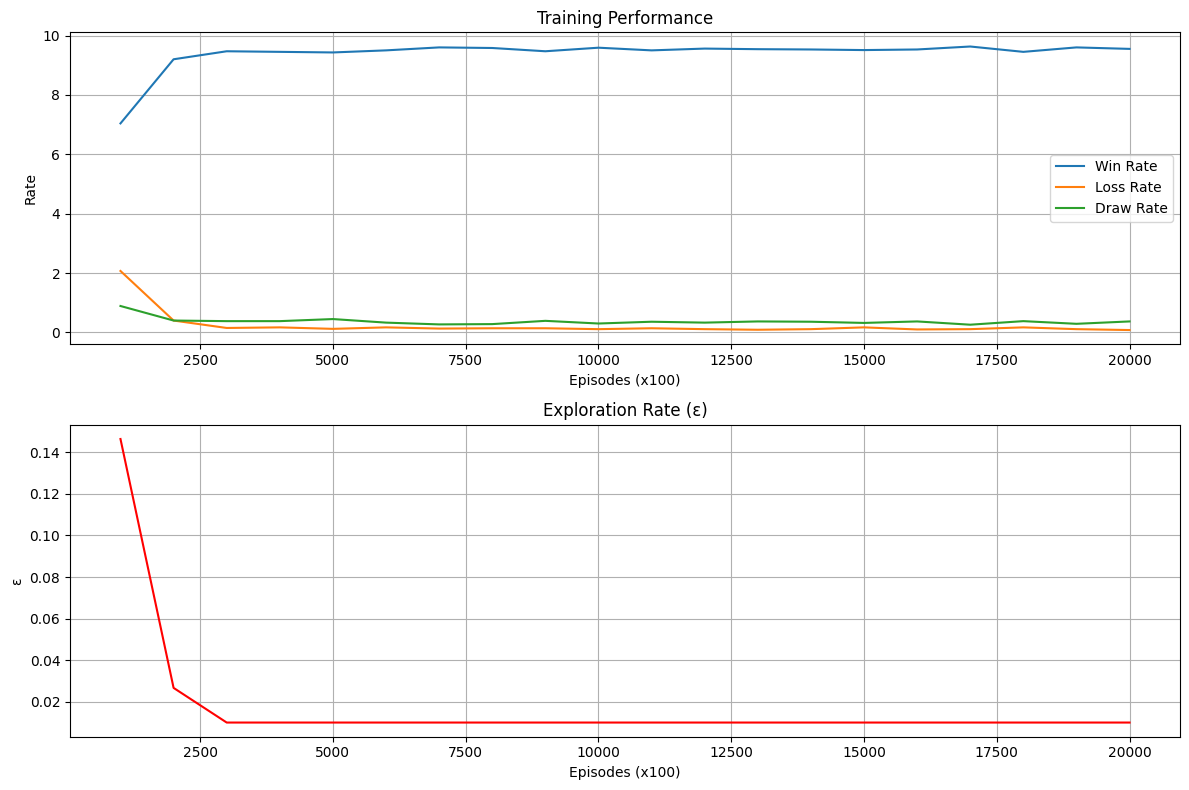


Training complete! Now you can play against the agent.
You are O (second player). The agent is X (first player).
Enter moves as numbers corresponding to board positions:

  0 1 2
0 0 1 2
1 3 4 5
2 6 7 8
Current player: X

Agent's turn...

  0 1 2
0 X 1 2
1 3 4 5
2 6 7 8
Current player: O

Your move (enter position number): 2

  0 1 2
0 X 1 O
1 3 4 5
2 6 7 8
Current player: X

Agent's turn...

  0 1 2
0 X 1 O
1 3 4 5
2 X 7 8
Current player: O

Your move (enter position number): 3

  0 1 2
0 X 1 O
1 O 4 5
2 X 7 8
Current player: X

Agent's turn...

  0 1 2
0 X 1 O
1 O X 5
2 X 7 8
Current player: O

Your move (enter position number): 7

  0 1 2
0 X 1 O
1 O X 5
2 X O 8
Current player: X

Agent's turn...

  0 1 2
0 X 1 O
1 O X 5
2 X O X
Current player: X

Agent (X) wins! 🧠


In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
from collections import defaultdict
from time import sleep

class TicTacToe:
    def __init__(self):
        self.reset()

    def reset(self):
        """Reset the game board and state"""
        self.board = np.zeros((3, 3), dtype=int)
        self.current_player = 1
        self.done = False
        self.winner = None
        return self.get_state()

    def get_state(self):
        """Get the current game state as a hashable tuple"""
        return tuple(self.board.reshape(9))

    def available_actions(self):
        """Get list of available moves (0-8)"""
        return [i for i in range(9) if self.board.reshape(9)[i] == 0]

    def step(self, action):
        """
        Execute a move and return (new_state, reward, done)

        Args:
            action: Integer 0-8 representing board position

        Returns:
            tuple: (new_state, reward, done)
        """
        if self.done:
            return self.get_state(), 0, True

        row, col = divmod(action, 3)

        # Illegal move penalty
        if self.board[row, col] != 0:
            self.done = True
            return self.get_state(), -10, True

        # Make the move
        self.board[row, col] = self.current_player

        # Check for winner
        if self._check_winner(self.current_player):
            self.done = True
            self.winner = self.current_player
            reward = 1 if self.current_player == 1 else -1
            return self.get_state(), reward, True

        # Check for draw
        if len(self.available_actions()) == 0:
            self.done = True
            return self.get_state(), 0.5, True

        # Switch player
        self.current_player *= -1
        return self.get_state(), 0, False

    def _check_winner(self, player):
        """Check if the specified player has won"""
        board = self.board
        # Check rows and columns
        for i in range(3):
            if all(board[i, :] == player) or all(board[:, i] == player):
                return True
        # Check diagonals
        if (board[0, 0] == board[1, 1] == board[2, 2] == player or
            board[0, 2] == board[1, 1] == board[2, 0] == player):
            return True
        return False

    def render(self):
        """Display the current board state with move numbers"""
        symbols = {1: 'X', -1: 'O', 0: ' '}
        print("\n  0 1 2")
        for i in range(3):
            row = []
            for j in range(3):
                if self.board[i, j] == 0:
                    row.append(str(i*3 + j))  # Show position numbers for empty cells
                else:
                    row.append(symbols[self.board[i, j]])
            print(f"{i} {' '.join(row)}")
        print(f"Current player: {'X' if self.current_player == 1 else 'O'}\n")

class QLearningAgent:
    def __init__(self, alpha=0.1, gamma=0.9, epsilon=1.0,
                 epsilon_decay=0.9995, epsilon_min=0.01):
        """
        Initialize Q-learning agent

        Args:
            alpha: Learning rate (0-1)
            gamma: Discount factor (0-1)
            epsilon: Exploration rate (0-1)
            epsilon_decay: Rate at which epsilon decreases
            epsilon_min: Minimum exploration rate
        """
        self.q_table = defaultdict(lambda: np.zeros(9))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.training_history = []

    def get_q_values(self, state):
        """Get Q-values for all actions in given state"""
        return self.q_table[state]

    def choose_action(self, state, available_actions, training=True):
        """
        Choose action using ε-greedy policy

        Args:
            state: Current game state
            available_actions: List of legal moves
            training: Whether to use exploration

        Returns:
            int: Chosen action (0-8)
        """
        if training and np.random.random() < self.epsilon:
            return random.choice(available_actions)
        q_values = self.get_q_values(state)

        filtered_qs = {a: q_values[a] for a in available_actions}
        return max(filtered_qs.items(), key=lambda x: x[1])[0]

    def learn(self, state, action, reward, next_state, done, available_actions):
        """
        Update Q-values using Q-learning update rule

        Args:
            state: Current state
            action: Taken action
            reward: Received reward
            next_state: Resulting state
            done: Whether episode ended
            available_actions: Legal moves in next state
        """
        current_q = self.q_table[state][action]

        # Calculate max Q for next state
        if done:
            next_max_q = 0
        else:
            next_max_q = max(self.q_table[next_state][a] for a in available_actions)

        # Bellman equation update
        new_q = current_q + self.alpha * (reward + self.gamma * next_max_q - current_q)
        self.q_table[state][action] = new_q

        # Decay exploration rate
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def record_episode(self, episode, wins, losses, draws):
        """Record training statistics"""
        self.training_history.append({
            'episode': episode,
            'wins': wins,
            'losses': losses,
            'draws': draws,
            'epsilon': self.epsilon
        })

    def plot_training(self):
        """Plot training progress"""
        if not self.training_history:
            print("No training data to plot")
            return

        eps = [x['episode'] for x in self.training_history]
        win_rates = [x['wins']/100 for x in self.training_history]
        loss_rates = [x['losses']/100 for x in self.training_history]
        draw_rates = [x['draws']/100 for x in self.training_history]
        epsilons = [x['epsilon'] for x in self.training_history]

        plt.figure(figsize=(12, 8))

        # Win/Loss/Draw rates
        plt.subplot(2, 1, 1)
        plt.plot(eps, win_rates, label='Win Rate')
        plt.plot(eps, loss_rates, label='Loss Rate')
        plt.plot(eps, draw_rates, label='Draw Rate')
        plt.title('Training Performance')
        plt.xlabel('Episodes (x100)')
        plt.ylabel('Rate')
        plt.legend()
        plt.grid(True)

        # Exploration rate
        plt.subplot(2, 1, 2)
        plt.plot(eps, epsilons, color='red')
        plt.title('Exploration Rate (ε)')
        plt.xlabel('Episodes (x100)')
        plt.ylabel('ε')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

def train_agent(episodes=10000, print_interval=1000):
    """Train the agent against a random opponent"""
    env = TicTacToe()
    agent = QLearningAgent()

    # Track performance
    stats = {'wins': 0, 'losses': 0, 'draws': 0}

    for episode in range(1, episodes + 1):
        state = env.reset()
        done = False

        while not done:

            available = env.available_actions()
            action = agent.choose_action(state, available)
            next_state, reward, done = env.step(action)


            if not done:
                # Random opponent's turn (O)
                opp_action = random.choice(env.available_actions())
                next_state, opp_reward, done = env.step(opp_action)


                if done:
                    reward = -1 if env.winner == -1 else 0.5


            agent.learn(state, action, reward, next_state, done, env.available_actions())
            state = next_state

        # Record results
        if env.winner == 1:
            stats['wins'] += 1
        elif env.winner == -1:
            stats['losses'] += 1
        else:
            stats['draws'] += 1

        # Print and reset stats periodically
        if episode % print_interval == 0:
            clear_output(wait=True)
            print(f"Episode {episode}/{episodes}")
            print(f"Win rate: {stats['wins']/print_interval:.2%}")
            print(f"Loss rate: {stats['losses']/print_interval:.2%}")
            print(f"Draw rate: {stats['draws']/print_interval:.2%}")
            print(f"Exploration rate: {agent.epsilon:.3f}")

            agent.record_episode(episode, stats['wins'], stats['losses'], stats['draws'])
            stats = {'wins': 0, 'losses': 0, 'draws': 0}  # Reset

    return agent

def play_against_agent(agent):
    """Interactive game between human and trained agent"""
    env = TicTacToe()
    state = env.reset()

    print("You are O (second player). The agent is X (first player).")
    print("Enter moves as numbers corresponding to board positions:")
    env.render()

    # Agent moves first
    print("Agent's turn...")
    sleep(1)
    available = env.available_actions()
    action = agent.choose_action(state, available, training=False)
    state, _, done = env.step(action)
    env.render()

    while not done:
        # My move
        while True:
            try:
                move = int(input("Your move (enter position number): "))
                if move not in env.available_actions():
                    print("Invalid move! Try again.")
                    continue
                break
            except ValueError:
                print("Please enter a number corresponding to an empty position.")

        state, _, done = env.step(move)
        env.render()

        if done:
            break

        # Agent move
        print("Agent's turn...")
        sleep(1)
        available = env.available_actions()
        action = agent.choose_action(state, available, training=False)
        state, _, done = env.step(action)
        env.render()

    # Game over
    if env.winner == 1:
        print("Agent (X) wins! 🧠")
    elif env.winner == -1:
        print("You (O) win! 🎉")
    else:
        print("It's a draw! 🤝")


print("Training agent against random opponent...")
agent = train_agent(episodes=20000)
agent.plot_training()

print("\nTraining complete! Now you can play against the agent.")
play_against_agent(agent)

#FEEDBACK

**The main issue in the code is that the agent learns from transitions that include the opponent's move, which confuses the learning process. The agent should learn immediately after its own actions for cleaner learning signals.**


#Now the problem with this one is that its not smart at all, Yes the user experience is improved but the Agent is not smart. Lets improve that...To improve this we use Deep Q-Learning

#It's still not smart.... so I did research and te solution is Deep-Learning.


In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict, deque
import time
import pickle
import os
from enum import Enum
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class Player(Enum):
    X = 1
    O = -1
    EMPTY = 0

class TicTacToe:
    def __init__(self):
        self.reset()

    def reset(self):
        self.board = np.full((3, 3), Player.EMPTY.value, dtype=int)
        self.current_player = Player.X
        self.done = False
        self.winner = None
        self.move_history = []
        return self.get_state()

    def get_state(self):
        return tuple(self.board.ravel())

    def get_state_tensor(self):
        """Convert board state to tensor format for neural network"""
        # Create a 3-channel representation: [X positions, O positions, Empty positions]
        state = np.zeros((3, 3, 3), dtype=np.float32)

        # Channel 0: X positions
        state[:, :, 0] = (self.board == Player.X.value).astype(np.float32)
        # Channel 1: O positions
        state[:, :, 1] = (self.board == Player.O.value).astype(np.float32)
        # Channel 2: Empty positions
        state[:, :, 2] = (self.board == Player.EMPTY.value).astype(np.float32)

        return torch.FloatTensor(state.flatten())

    def available_actions(self):
        return [i for i in range(9) if self.board.flat[i] == Player.EMPTY.value]

    def step(self, action):
        if self.done:
            return self.get_state(), 0, True

        row, col = divmod(action, 3)

        if self.board[row, col] != Player.EMPTY.value:
            self.done = True
            return self.get_state(), -10, True

        self.board[row, col] = self.current_player.value
        self.move_history.append((action, self.current_player))

        if self._check_winner(self.current_player):
            self.done = True
            self.winner = self.current_player
            return self.get_state(), 1, True

        if len(self.available_actions()) == 0:
            self.done = True
            return self.get_state(), 0.1, True

        self.current_player = Player.O if self.current_player == Player.X else Player.X
        return self.get_state(), 0, False

    def _check_winner(self, player):
        board = self.board
        for i in range(3):
            if all(board[i, :] == player.value) or all(board[:, i] == player.value):
                return True
        if (board[0, 0] == board[1, 1] == board[2, 2] == player.value or
            board[0, 2] == board[1, 1] == board[2, 0] == player.value):
            return True
        return False

    def get_strategic_positions(self, player):
        winning_moves = []
        blocking_moves = []
        fork_moves = []
        opponent = Player.O if player == Player.X else Player.X

        for action in self.available_actions():
            row, col = divmod(action, 3)

            # Check winning moves
            self.board[row, col] = player.value
            if self._check_winner(player):
                winning_moves.append(action)
            self.board[row, col] = Player.EMPTY.value

            # Check blocking moves
            self.board[row, col] = opponent.value
            if self._check_winner(opponent):
                blocking_moves.append(action)
            self.board[row, col] = Player.EMPTY.value

            # Check fork opportunities (simplified version)
            if action in [0, 2, 6, 8, 4]:  # Corners and center
                winning_paths = 0
                # Check rows
                temp_row = self.board[row, :].copy()
                temp_row[col] = player.value
                if sum(temp_row == player.value) == 2 and Player.EMPTY.value in temp_row:
                    winning_paths += 1
                # Check columns
                temp_col = self.board[:, col].copy()
                temp_col[row] = player.value
                if sum(temp_col == player.value) == 2 and Player.EMPTY.value in temp_col:
                    winning_paths += 1
                # Check diagonals if applicable
                if (row == col) or (row + col == 2):
                    if row == col:  # Main diagonal
                        temp_diag = np.diag(self.board).copy()
                        temp_diag[row] = player.value
                        if sum(temp_diag == player.value) == 2 and Player.EMPTY.value in temp_diag:
                            winning_paths += 1
                    if row + col == 2:  # Anti-diagonal
                        temp_anti = np.diag(np.fliplr(self.board)).copy()
                        temp_anti[2 - col] = player.value
                        if sum(temp_anti == player.value) == 2 and Player.EMPTY.value in temp_anti:
                            winning_paths += 1
                if winning_paths >= 2:
                    fork_moves.append(action)

        return winning_moves, blocking_moves, fork_moves

    def render(self, show_help=True):
        symbols = {
            Player.X.value: 'X',
            Player.O.value: 'O',
            Player.EMPTY.value: ' '
        }

        print("\n  0 | 1 | 2")
        print("  --|---|--")
        for i in range(3):
            row_display = []
            for j in range(3):
                pos = i * 3 + j
                cell = self.board[i, j]
                if cell == Player.EMPTY.value:
                    row_display.append(str(pos))
                else:
                    row_display.append(symbols[cell])
            print(f"{i} {' | '.join(row_display)}")
            if i < 2:
                print("  --|---|--")

        if not self.done:
            print(f"\nCurrent player: {self.current_player.name}")
            if show_help:
                print(f"Available moves: {self.available_actions()}")

class DQN(nn.Module):
    """Deep Q-Network for Tic-Tac-Toe"""

    def __init__(self, input_size=27, hidden_sizes=[256, 256, 128, 64], output_size=9):
        super(DQN, self).__init__()

        # Build the network layers
        layers = []
        prev_size = input_size

        for hidden_size in hidden_sizes:
            layers.extend([
                nn.Linear(prev_size, hidden_size),
                nn.ReLU(),
                nn.Dropout(0.2)
            ])
            prev_size = hidden_size

        # Output layer
        layers.append(nn.Linear(prev_size, output_size))

        self.network = nn.Sequential(*layers)

        # Initialize weights
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.xavier_uniform_(module.weight)
            torch.nn.init.zeros_(module.bias)

    def forward(self, x):
        return self.network(x)

class ReplayBuffer:
    """Experience replay buffer for DQN"""

    def __init__(self, capacity=20000):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)

        return (torch.stack(states),
                torch.LongTensor(actions),
                torch.FloatTensor(rewards),
                torch.stack(next_states),
                torch.BoolTensor(dones))

    def __len__(self):
        return len(self.buffer)

class DeepQLearningAgent:
    def __init__(self, lr=0.0005, gamma=0.99, epsilon=1.0,
                 epsilon_decay=0.9997, epsilon_min=0.02,
                 batch_size=64, memory_size=20000, target_update=200):

        # Hyperparameters
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.batch_size = batch_size
        self.target_update = target_update

        # Neural networks
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.q_network = DQN().to(self.device)
        self.target_network = DQN().to(self.device)

        # Optimizer with weight decay
        self.optimizer = optim.AdamW(self.q_network.parameters(), lr=lr, weight_decay=1e-4)
        self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=10000, gamma=0.9)

        # Experience replay
        self.memory = ReplayBuffer(memory_size)

        # Training metrics
        self.training_history = []
        self.steps_done = 0
        self.player = Player.X

        # Copy weights to target network
        self.update_target_network()

        print(f"🧠 Enhanced Deep Q-Network initialized")
        print(f"   Device: {self.device}")
        print(f"   Network: {sum(p.numel() for p in self.q_network.parameters())} parameters")

    def update_target_network(self):
        """Copy weights from main network to target network"""
        self.target_network.load_state_dict(self.q_network.state_dict())

    def get_q_values(self, state):
        """Get Q-values for a state"""
        if isinstance(state, tuple):
            # Convert tuple state to tensor
            env = TicTacToe()
            env.board = np.array(state).reshape(3, 3)
            state_tensor = env.get_state_tensor()
        else:
            state_tensor = state

        with torch.no_grad():
            state_tensor = state_tensor.unsqueeze(0).to(self.device)
            q_values = self.q_network(state_tensor)
            return q_values.squeeze().cpu().numpy()

    def choose_action(self, state, available_actions, training=True):
        if not available_actions:
            return None

        # Strategic exploration during training
        if training and np.random.random() < self.epsilon:
            # Use strategic exploration like in the original agent
            env = TicTacToe()
            if isinstance(state, tuple):
                env.board = np.array(state).reshape(3, 3)
            env.current_player = self.player

            winning_moves, blocking_moves, fork_moves = env.get_strategic_positions(self.player)

            if winning_moves:
                return random.choice(winning_moves)
            if blocking_moves:
                return random.choice(blocking_moves)
            if fork_moves:
                return random.choice(fork_moves)

            # Prefer center and corners during exploration
            preferred = [a for a in available_actions if a in [0, 2, 6, 8, 4]]
            if preferred:
                return random.choice(preferred)

            return random.choice(available_actions)

        # Exploitation using neural network
        q_values = self.get_q_values(state)

        # Mask unavailable actions
        masked_q_values = np.full(9, -np.inf)
        for action in available_actions:
            masked_q_values[action] = q_values[action]

        return np.argmax(masked_q_values)

    def learn(self):
        """Train the network using experience replay with improvements"""
        if len(self.memory) < self.batch_size:
            return

        # Sample a batch of experiences
        states, actions, rewards, next_states, dones = self.memory.sample(self.batch_size)

        states = states.to(self.device)
        actions = actions.to(self.device)
        rewards = rewards.to(self.device)
        next_states = next_states.to(self.device)
        dones = dones.to(self.device)

        # Current Q-values
        current_q_values = self.q_network(states).gather(1, actions.unsqueeze(1))

        # Double DQN: use main network to select actions, target network to evaluate
        with torch.no_grad():
            next_actions = self.q_network(next_states).max(1)[1]
            next_q_values = self.target_network(next_states).gather(1, next_actions.unsqueeze(1)).squeeze()
            target_q_values = rewards + (self.gamma * next_q_values * ~dones)

        # Compute Huber loss (more robust than MSE)
        loss = F.smooth_l1_loss(current_q_values.squeeze(), target_q_values)

        # Optimize
        self.optimizer.zero_grad()
        loss.backward()

        # Gradient clipping for stability
        torch.nn.utils.clip_grad_norm_(self.q_network.parameters(), 1.0)

        self.optimizer.step()
        self.scheduler.step()

        # Update target network periodically
        self.steps_done += 1
        if self.steps_done % self.target_update == 0:
            self.update_target_network()

        return loss.item()

    def decay_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

    def save(self, filename):
        torch.save({
            'q_network_state_dict': self.q_network.state_dict(),
            'target_network_state_dict': self.target_network.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'params': {
                'lr': self.lr,
                'gamma': self.gamma,
                'epsilon': self.epsilon,
                'epsilon_decay': self.epsilon_decay,
                'epsilon_min': self.epsilon_min,
                'batch_size': self.batch_size,
                'target_update': self.target_update
            },
            'training_history': self.training_history,
            'steps_done': self.steps_done
        }, filename)
        print(f"💾 Deep agent saved to {filename}")

    @classmethod
    def load(cls, filename):
        checkpoint = torch.load(filename, map_location='cpu')

        agent = cls(**checkpoint['params'])
        agent.q_network.load_state_dict(checkpoint['q_network_state_dict'])
        agent.target_network.load_state_dict(checkpoint['target_network_state_dict'])
        agent.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        agent.training_history = checkpoint['training_history']
        agent.steps_done = checkpoint['steps_done']

        print(f"📁 Deep agent loaded from {filename}")
        return agent

def train_deep_agent(episodes=50000, save_path="deep_ttt_agent.pth"):
    env = TicTacToe()
    agent = DeepQLearningAgent()

    # Progressive opponents
    opponents = [
        SmartRandomOpponent(skill_level=0.3),  # Beginner
        SmartRandomOpponent(skill_level=0.6),  # Intermediate
        SmartRandomOpponent(skill_level=0.9)   # Advanced
    ]

    stats = {'wins': 0, 'losses': 0, 'draws': 0}
    losses = []

    print("🚀 Training Deep Q-Network agent...")
    print(f"Episodes: {episodes:,}")
    print("=" * 60)

    for episode in range(1, episodes + 1):
        # Progressively harder opponents
        if episode < episodes * 0.3:
            opponent = opponents[0]
        elif episode < episodes * 0.7:
            opponent = opponents[1]
        else:
            opponent = opponents[2]

        env.reset()

        while not env.done:
            if env.current_player == Player.X:  # Agent's turn
                state = env.get_state_tensor()
                available = env.available_actions()

                action = agent.choose_action(state, available, training=True)
                next_state_tuple, reward, done = env.step(action)
                next_state = env.get_state_tensor()

                # Additional reward for strategic positions
                if action == 4:  # Center
                    reward += 0.3
                elif action in [0, 2, 6, 8]:  # Corners
                    reward += 0.2

                # Store experience in replay buffer
                agent.memory.push(state, action, reward, next_state, done)

                # Train the network
                if len(agent.memory) >= agent.batch_size:
                    loss = agent.learn()
                    if loss is not None:
                        losses.append(loss)

            else:  # Opponent's turn
                action = opponent.choose_action(env)
                if action is not None:
                    env.step(action)

        # Game outcome tracking
        if env.winner == Player.X:
            stats['wins'] += 1
        elif env.winner == Player.O:
            stats['losses'] += 1
        else:
            stats['draws'] += 1

        agent.decay_epsilon()

        # Progress reporting
        if episode % 2500 == 0 or episode == episodes:
            total = max(1, stats['wins'] + stats['losses'] + stats['draws'])
            win_rate = stats['wins'] / total
            loss_rate = stats['losses'] / total
            draw_rate = stats['draws'] / total
            avg_loss = np.mean(losses[-1000:]) if losses else 0

            agent.training_history.append({
                'episode': episode,
                'win_rate': win_rate,
                'epsilon': agent.epsilon,
                'avg_loss': avg_loss,
                'memory_size': len(agent.memory)
            })

            print(f"Episode {episode:,}")
            print(f"  Win rate: {win_rate:.1%}  Loss rate: {loss_rate:.1%}  Draw rate: {draw_rate:.1%}")
            print(f"  Exploration: {agent.epsilon:.4f}  Avg Loss: {avg_loss:.6f}")
            print(f"  Memory size: {len(agent.memory):,}")
            print("-" * 60)

            stats = {'wins': 0, 'losses': 0, 'draws': 0}

    if save_path:
        agent.save(save_path)
        print(f"💾 Saved trained deep agent to {save_path}")

    return agent

def main():
    print("🧠 Deep Q-Learning Tic-Tac-Toe AI")
    print("=" * 50)

    agent_file = "deep_ttt_agent.pth"
    agent = None

    if os.path.exists(agent_file):
        try:
            agent = DeepQLearningAgent.load(agent_file)
            print(f"✅ Loaded trained deep agent from {agent_file}")
            print(f"  Memory size: {len(agent.memory):,} experiences")
            print(f"  Current ε: {agent.epsilon:.4f}")
        except Exception as e:
            print(f"⚠️ Error loading agent: {e}")
            agent = None

    while True:
        print("\n" + "=" * 40)
        print("Main Menu:")
        print("1. Train new deep agent")
        print("2. Evaluate deep agent")
        print("3. Play against deep agent")
        print("4. View training history")
        print("5. Exit")

        choice = input("Select option (1-5): ").strip()

        if choice == '1':
            try:
                episodes = int(input("Training episodes (default 50000): ") or 50000)
                agent = train_deep_agent(episodes=episodes)
                plot_deep_training(agent.training_history)
            except ValueError:
                print("Invalid input! Using default 50000 episodes")
                agent = train_deep_agent()
                plot_deep_training(agent.training_history)

        elif choice == '2':
            if agent is None:
                print("No agent loaded! Please train or load an agent first.")
                continue

            try:
                games = int(input("Evaluation games (default 1000): ") or 1000)
                level = float(input("Opponent skill level (0.1-1.0, default 0.8): ") or 0.8)
                evaluate_deep_agent(agent, games=games, opponent_level=level)
            except ValueError:
                print("Invalid input! Using defaults")
                evaluate_deep_agent(agent)

        elif choice == '3':
            if agent is None:
                print("No agent loaded! Please train or load an agent first.")
                continue

            while True:
                first = input("Go first? (y/n): ").lower().strip()
                if first in ['y', 'n']:
                    play_interactive_deep(agent, human_first=(first == 'y'))
                    break
                print("Please enter 'y' or 'n'")

            if input("Play again? (y/n): ").lower() != 'y':
                continue

        elif choice == '4':
            if agent and agent.training_history:
                plot_deep_training(agent.training_history)
            else:
                print("No training history available!")

        elif choice == '5':
            break

        else:
            print("Invalid choice! Please enter 1-5")

    print("\n👋 Thanks for playing!")

if __name__ == "__main__":
    main()

🧠 Deep Q-Learning Tic-Tac-Toe AI

Main Menu:
1. Train new deep agent
2. Evaluate deep agent
3. Play against deep agent
4. View training history
5. Exit
Select option (1-5): 3
No agent loaded! Please train or load an agent first.

Main Menu:
1. Train new deep agent
2. Evaluate deep agent
3. Play against deep agent
4. View training history
5. Exit


KeyboardInterrupt: Interrupted by user